# Turning our dataSet with Yearly values into Monhtly values 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load your dataset
df = pd.read_csv('DataSets /WORLD-OWID-Features')

# Convert the 'year' column to datetime index
#df['year'] = pd.to_datetime(df['year'], format='%Y')
df.set_index('year', inplace=True)

# Replacing the outliers of 2020 due to Corona 

In [4]:
mean_co2 = df.loc[[2019, 2021], 'co2'].mean()
df.loc[2020, 'co2'] = mean_co2

df.tail(3)

,cement_co2,co2,coal_co2,flaring_co2,gas_co2,land_use_change_co2,oil_co2,other_industry_co2
year,,,,,,,,
2019,1617.507,37082.5590,14725.978,439.254,7647.528,4557.283,12345.653,306.639
2020,1637.537,37103.2055,14174.564,407.584,7556.290,4057.758,11191.809,296.302
2021,1672.592,37123.8520,14979.598,416.526,7921.830,3939.044,11837.159,296.146


# Turning yearly dataset into Monthly 

In [5]:
df.index = pd.to_datetime(df.index, format='%Y')

In [15]:
# Resample to monthly frequency
df_monthly = df.resample('MS').asfreq()

In [16]:
# Interpolate missing data within each month
df_monthly_interpolated = df_monthly.interpolate(method='linear')

In [13]:
df

,cement_co2,co2,coal_co2,flaring_co2,gas_co2,land_use_change_co2,oil_co2,other_industry_co2
year,,,,,,,,
1750-01-01,317.372711,9.3510,9.351,256.309556,1814.698707,4316.805465,3625.609168,82.069576
1751-01-01,317.372711,9.3510,9.351,256.309556,1814.698707,4316.805465,3625.609168,82.069576
1752-01-01,317.372711,9.3540,9.354,256.309556,1814.698707,4316.805465,3625.609168,82.069576
1753-01-01,317.372711,9.3540,9.354,256.309556,1814.698707,4316.805465,3625.609168,82.069576
1754-01-01,317.372711,9.3580,9.358,256.309556,1814.698707,4316.805465,3625.609168,82.069576
...,...,...,...,...,...,...,...,...
2017-01-01,1507.923000,36096.7380,14506.974,391.992000,7144.928000,4331.947000,12242.628000,302.294000
2018-01-01,1569.218000,36826.5080,14746.831,412.116000,7529.847000,4181.356000,12266.017000,302.479000
2019-01-01,1617.507000,37082.5590,14725.978,439.254000,7647.528000,4557.283000,12345.653000,306.639000


In [6]:
plt.figure(figsize=(10, 6))

for column in df_monthly_interpolated.columns:
    plt.plot(df_monthly_interpolated.index, df_monthly_interpolated[column], label=column)

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Individual Feature Plots')
plt.legend()
plt.show()

NameError: name 'df_monthly_interpolated' is not defined

<Figure size 1000x600 with 0 Axes>

# Proceeding with the data starting from 1880 (Checkout visualization)

In [17]:
start_date = pd.to_datetime('1880-01-01')
subset_df = df.loc[start_date:]

In [20]:
subset_df

,cement_co2,co2,coal_co2,flaring_co2,gas_co2,land_use_change_co2,oil_co2,other_industry_co2
year,,,,,,,,
1880-01-01,0.000,853.7050,838.340,256.309556,1814.698707,3100.721,15.364,82.069576
1881-01-01,0.000,882.4050,865.162,256.309556,1814.698707,3096.935,17.242,82.069576
1882-01-01,0.000,931.9220,912.817,256.309556,0.165000,3159.833,18.939,82.069576
1883-01-01,0.000,991.0320,974.149,256.309556,0.381000,3220.534,16.502,82.069576
1884-01-01,0.000,1002.1740,982.679,256.309556,1.172000,3240.197,18.323,82.069576
...,...,...,...,...,...,...,...,...
2017-01-01,1507.923,36096.7380,14506.974,391.992000,7144.928000,4331.947,12242.628,302.294000
2018-01-01,1569.218,36826.5080,14746.831,412.116000,7529.847000,4181.356,12266.017,302.479000
2019-01-01,1617.507,37082.5590,14725.978,439.254000,7647.528000,4557.283,12345.653,306.639000


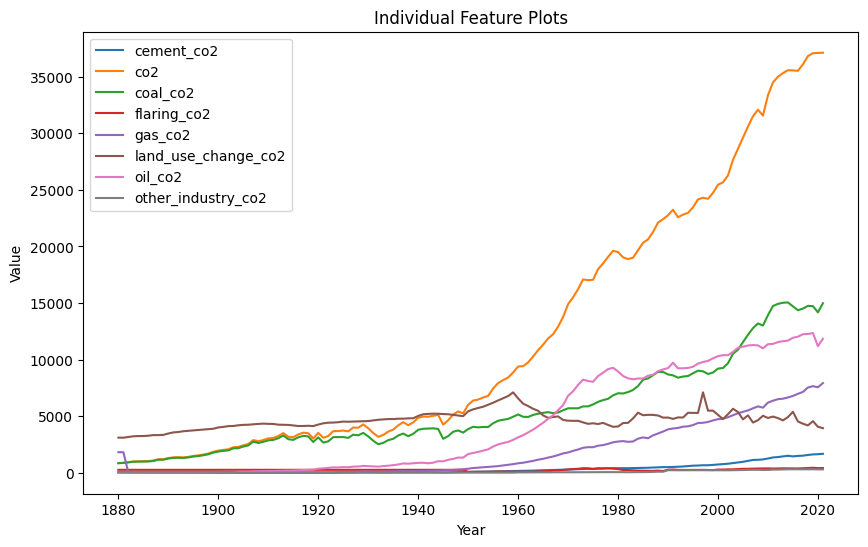

In [21]:
plt.figure(figsize=(10, 6))

for column in subset_df.columns:
    plt.plot(subset_df.index, subset_df[column], label=column)

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Individual Feature Plots')
plt.legend()
plt.show()

In [22]:
subset_df.to_csv('WORLD-OWID-Features-Yearly')